In [8]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

from Functions import split_data
from Functions import engineer_features
from Functions import accuracy_scorer
from Functions import remove_outliers_iqr
from Functions import normalize
from Functions import run_SVM_classifier


from sklearn.model_selection import GridSearchCV

In [9]:
data = pd.read_csv('./FIFA18_players_database/CompleteDataset.csv', low_memory=False)

In [10]:
data = engineer_features(data)
data = data.sample(frac=1).reset_index(drop=True)

In [11]:
X_train, X_test, y_train, y_test = split_data(data, 0)

In [30]:
# SVM trained on not normalized data and outliers included.
y_test_pred, y_train_pred, classifier = run_SVM_classifier(X_train, X_test, y_train, 'rbf', 100, True)

# Calculate test and train accuracy
acc_train = accuracy_scorer(y_train, y_train_pred)
acc_test = accuracy_scorer(y_test, y_test_pred)

# Print accuracy with 3 decimals
print(f"Accuracy of train: {acc_train:.3f}")
print(f"Accuracy of test: {acc_test:.3f}")

Accuracy of train: 0.594
Accuracy of test: 0.255


In [12]:
X_train_minmax = normalize(X_train, "minmax", False)
X_test_minmax = normalize(X_test, "minmax",False)

In [13]:
# SVM trained on normalized data but with outliers
y_test_pred, y_train_pred, classifier = run_SVM_classifier(X_train_minmax, X_test_minmax, y_train, 'rbf', 100, True)

# Calculate test and train accuracy
acc_train = accuracy_scorer(y_train, y_train_pred)
acc_test = accuracy_scorer(y_test, y_test_pred)

# Print accuracy with 3 decimals
print(f"Accuracy of train: {acc_train:.3f}")
print(f"Accuracy of test: {acc_test:.3f}")

Accuracy of train: 0.470
Accuracy of test: 0.771


In [14]:
df_no_outliers = remove_outliers_iqr(data)
X_train, X_test, y_train, y_test = split_data(df_no_outliers, 0)
X_train_minmax = normalize(X_train, "minmax", False)
X_test_minmax = normalize(X_test, "minmax",False)

In [15]:
### SVM trained on normalized data with outliers removed.
y_test_pred, y_train_pred, classifier = run_SVM_classifier(X_train_minmax, X_test_minmax, y_train, 'rbf', 100, True)

# Calculate test and train accuracy
acc_train = accuracy_scorer(y_train, y_train_pred)
acc_test = accuracy_scorer(y_test, y_test_pred)

# Print accuracy with 3 decimals
print(f"Accuracy of train: {acc_train:.3f}")
print(f"Accuracy of test: {acc_test:.3f}")

Accuracy of train: 0.470
Accuracy of test: 0.771


In [6]:
### SVM trained on un normalized data with outliers removed
y_test_pred, y_train_pred, classifier = run_SVM_classifier(X_train, X_test, y_train, 'rbf', 100, True)

# Calculate test and train accuracy
acc_train = accuracy_scorer(y_train, y_train_pred)
acc_test = accuracy_scorer(y_test, y_test_pred)

# Print accuracy with 3 decimals
print(f"Accuracy of train: {acc_train:.3f}")
print(f"Accuracy of test: {acc_test:.3f}")

Accuracy of train: 0.593
Accuracy of test: 0.246


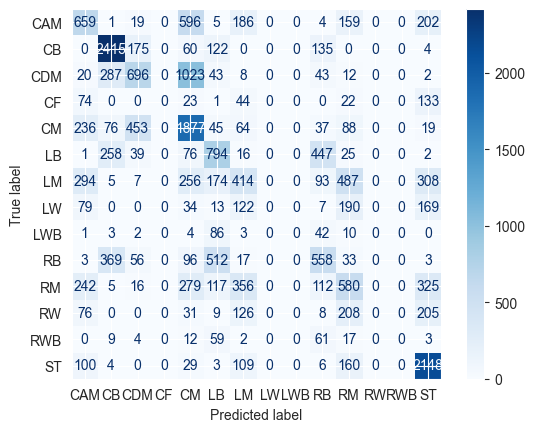

In [19]:
X_train_np = np.array(X_train_minmax)
ConfusionMatrixDisplay.from_estimator(classifier, X_train_np, y_train, cmap="Blues")

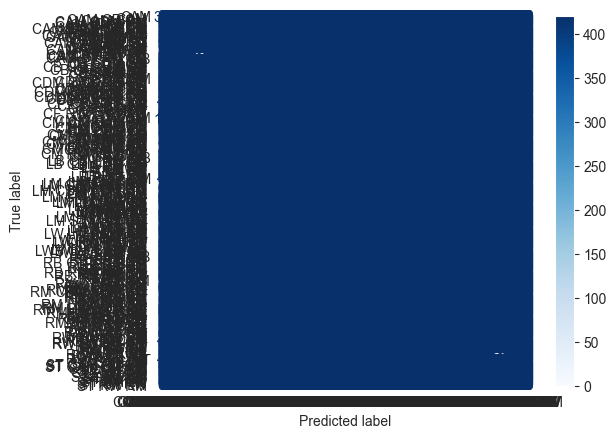

In [21]:
X_test_np = np.array(X_test_minmax)
ConfusionMatrixDisplay.from_estimator(classifier, X_test_np, y_test, cmap="Blues")

Notice the predictions, ex: CDM is predicted as both CDM and CM.

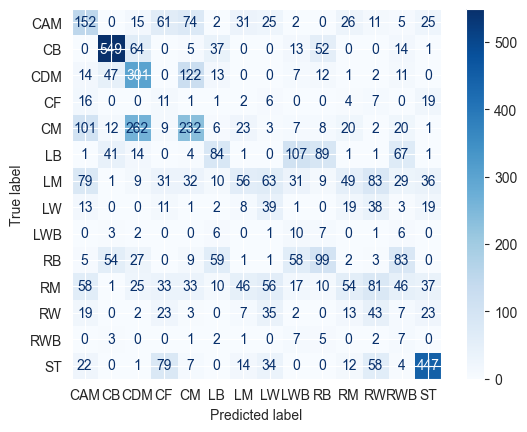

In [94]:
# Matrix of test
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap="Blues")

In [95]:
param_grid = {
    'C': [100],           # Regularization parameter
    'kernel': ['rbf'],      # Kernel type
    'gamma': ['auto'],       # Kernel coefficient
    'class_weight': [None]  # Class weights
}

grid_search = GridSearchCV(estimator = classifier, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Perform grid search on training data
grid_search.fit(X_test, y_test)

# Best parameters and model
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Hyperparameters: {'C': 10, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}


Took too long to run grid search on the train data, so did it on the test data.

In [96]:
svm_classifierRBF = SVC(kernel='rbf', C=10, gamma=0.03571429)

svm_classifierRBF.fit(X_train, y_train)
y_test_predRBF = svm_classifierRBF.predict(X_test)
y_train_predRBF = svm_classifierRBF.predict(X_train)

# Calculate test and train accuracy
acc_train = accuracy_score(y_train, y_train_predRBF)
acc_test = accuracy_score(y_test, y_test_predRBF)

# Print accuracy with 3 decimals
print(f"Accuracy of train: {acc_train:.3f}")
print(f"Accuracy of test: {acc_test:.3f}")


Accuracy of train: 0.473
Accuracy of test: 0.458


Marginal improvement result with RBF, and C=100.

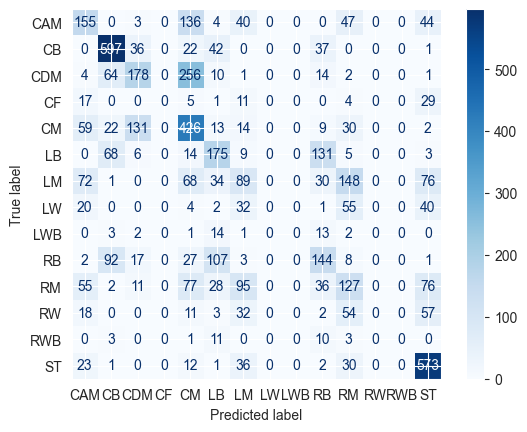

In [97]:
ConfusionMatrixDisplay.from_estimator(svm_classifierRBF, X_test, y_test, cmap="Blues")

Okey lets try with data that is not-normalized and includes outliers.